------------
# EDA_개인 프로젝트_장호정
## 소개
- 목표 : RFM분석 및 고객 세분화를 통해 경영 전략 수립
<br></br>
- 문제 정의 :
    - 한국 전자상거래 시장 규모는 전세계 5위(2020년 기준)이다.
    - 기업간 경쟁은 더욱 심화되고 있고 이에 따라 데이터를 통한 전략 수립이 필요
    - 각 고객의 특징을 고려한 경영 전략을 통해 고객활성화 및 매출 증진 효과 기대 
<br></br>
- 데이터 : 브라질 Olist 기업의 이커머스 데이터
            - 2016년부터 2018년까지 10만 건의 주문 정보를 담고있음
<br></br>
- 총 Part 3
    - Part 1 : RFM 계산
                - RFM분석은 고객의 과거 구매이력을 이용하여 R(Recency:최근성), F(Frequency:빈도), M(Monetary:구매금액)을 분석하는 방법
    - Part 2 : RFM 분석
    - Part 3 : 고객별 RFM점수에 따른 고객 등급화
   
-------------------------

## Part 1 RFM 계산

### 1-1) 데이터 준비

In [8]:
import pandas as pd
customers_df = pd.read_csv('./data/olist_customers_dataset.csv')
orders_df = pd.read_csv('./data/olist_orders_dataset.csv')
payments_df = pd.read_csv('./data/olist_order_payments_dataset.csv')

### 1-2) Frequency 계산

In [9]:
df = customers_df[['customer_id', 'customer_unique_id']]
tmp = df['customer_unique_id'].values.tolist()
df['F'] = [tmp.count(i) for i in tmp]
df

C:\Users\User\AppData\Local\Temp\ipykernel_9272\3595439808.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,customer_id,customer_unique_id,F
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,1
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,1
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,1
...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,1
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,1
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,1
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,1


In [10]:
df['F'].value_counts()

1     93099
2      5490
3       609
4       120
5        40
6        36
7        21
17       17
9         9
Name: F, dtype: int64

### 1-3) Monetary 계산

In [11]:
payments_df = payments_df[['order_id', 'payment_value']]
payments_df = payments_df.groupby('order_id').sum().reset_index()
payments_df

,order_id,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04
...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,343.40
99436,fffcd46ef2263f404302a634eb57f7eb,386.53
99437,fffce4705a9662cd70adb13d4a31832d,116.85
99438,fffe18544ffabc95dfada21779c9644f,64.71


In [12]:
# 데이터프레임 합치기(고객빈도데이터 + 최근 주문날짜 데이터 + 구매금액데이터)
orders_df = orders_df[['order_id', 'customer_id', 'order_purchase_timestamp']]
merge_outer = pd.merge(df,orders_df, how='outer',on='customer_id')
merge_outer = pd.merge(merge_outer,payments_df, how='outer',on='order_id')
merge_outer

,customer_id,customer_unique_id,F,order_id,order_purchase_timestamp,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,1,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,1,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,1,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,252.25
...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,1,6760e20addcf0121e9d58f2f1ff14298,2018-04-07 15:48:17,88.78
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,1,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-04 08:20:22,129.06
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,1,fed4434add09a6f332ea398efd656a5c,2018-04-08 20:11:50,56.04
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,1,e31ec91cea1ecf97797787471f98a8c2,2017-11-03 21:08:33,711.07


In [13]:
# 구매금액에 null값 확인
merge_outer.isna().sum()

customer_id                 0
customer_unique_id          0
F                           0
order_id                    0
order_purchase_timestamp    0
payment_value               1
dtype: int64

In [14]:
# null값 제거
merge_outer = merge_outer[merge_outer['payment_value'].notnull()]
merge_outer.isna().sum()

customer_id                 0
customer_unique_id          0
F                           0
order_id                    0
order_purchase_timestamp    0
payment_value               0
dtype: int64

In [15]:
# 주문날짜 데이터 타입 날짜로 변경
merge_outer['order_purchase_timestamp'] = pd.to_datetime(merge_outer['order_purchase_timestamp'])
merge_outer.info()

C:\Users\User\AppData\Local\Temp\ipykernel_9272\2267399251.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<class 'pandas.core.frame.DataFrame'>
Int64Index: 99440 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_id               99440 non-null  object        
 1   customer_unique_id        99440 non-null  object        
 2   F                         99440 non-null  int64         
 3   order_id                  99440 non-null  object        
 4   order_purchase_timestamp  99440 non-null  datetime64[ns]
 5   payment_value             99440 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 5.3+ MB


In [16]:
# 고객별 구매금액 합치기
tmp = merge_outer[['customer_unique_id','payment_value']]
tmp = tmp.groupby('customer_unique_id').sum().reset_index()
tmp

,customer_unique_id,payment_value
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89
...,...,...
96090,fffcf5a5ff07b0908bd4e2dbc735a684,2067.42
96091,fffea47cd6d3cc0a88bd621562a9d061,84.58
96092,ffff371b4d645b6ecea244b27531430a,112.46
96093,ffff5962728ec6157033ef9805bacc48,133.69


In [18]:
# 고객별 가장 최근 주문날짜만 남기기
tmp2 = merge_outer[['customer_unique_id','order_purchase_timestamp','F']]
tmp2 = tmp2.sort_values(['customer_unique_id', 'order_purchase_timestamp'], ascending=[True, False])
tmp2 = tmp2.drop_duplicates('customer_unique_id')
tmp2

,customer_unique_id,order_purchase_timestamp,F
64012,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1
24570,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1
40832,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1
57118,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1
81150,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1
...,...,...,...
89147,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,1
9810,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,1
69017,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,1
94891,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,1


In [19]:
# 데이터프레임 합치기(고객별 구매금액 합 데이터 + 고객별 가장 최근 주문날짜 데이터)
result_df = pd.merge(tmp,tmp2, how='outer',on='customer_unique_id')
result_df

,customer_unique_id,payment_value,order_purchase_timestamp,F
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,2018-05-10 10:56:27,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,2018-05-07 11:11:27,1
2,0000f46a3911fa3c0805444483337064,86.22,2017-03-10 21:05:03,1
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,2017-10-12 20:29:41,1
4,0004aac84e0df4da2b147fca70cf8255,196.89,2017-11-14 19:45:42,1
...,...,...,...,...
96090,fffcf5a5ff07b0908bd4e2dbc735a684,2067.42,2017-06-08 21:00:36,1
96091,fffea47cd6d3cc0a88bd621562a9d061,84.58,2017-12-10 20:07:56,1
96092,ffff371b4d645b6ecea244b27531430a,112.46,2017-02-07 15:49:16,1
96093,ffff5962728ec6157033ef9805bacc48,133.69,2018-05-02 15:17:41,1


In [20]:
# 컬럼명 수정
result_df.rename(columns={'payment_value':'Monetary','order_purchase_timestamp': 'Recency',  'F': 'Frequency'}, inplace=True)
result_df

,customer_unique_id,Monetary,Recency,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,2018-05-10 10:56:27,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,2018-05-07 11:11:27,1
2,0000f46a3911fa3c0805444483337064,86.22,2017-03-10 21:05:03,1
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,2017-10-12 20:29:41,1
4,0004aac84e0df4da2b147fca70cf8255,196.89,2017-11-14 19:45:42,1
...,...,...,...,...
96090,fffcf5a5ff07b0908bd4e2dbc735a684,2067.42,2017-06-08 21:00:36,1
96091,fffea47cd6d3cc0a88bd621562a9d061,84.58,2017-12-10 20:07:56,1
96092,ffff371b4d645b6ecea244b27531430a,112.46,2017-02-07 15:49:16,1
96093,ffff5962728ec6157033ef9805bacc48,133.69,2018-05-02 15:17:41,1


In [21]:
# null값 확인
result_df.isna().sum()

customer_unique_id    0
Monetary              0
Recency               0
Frequency             0
dtype: int64

### 1-4) Recency 계산

In [22]:
#전체 구매일 중 가장 최근의 일자를 기준일로 하여 last_date라는 변수에 할당
#last_date에서 각 고객별 R 일자를 빼서, 기준일까지 얼마나 지났는지 계산
last_date = result_df['Recency'].max() + pd.to_timedelta(1, 'D')

result_df['Recency'] = last_date - result_df['Recency']
result_df['Recency'] = result_df['Recency'].dt.days
result_df = result_df[['customer_unique_id','Recency', 'Frequency', 'Monetary']]
result_df

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19
2,0000f46a3911fa3c0805444483337064,586,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,337,1,196.89
...,...,...,...,...
96090,fffcf5a5ff07b0908bd4e2dbc735a684,496,1,2067.42
96091,fffea47cd6d3cc0a88bd621562a9d061,311,1,84.58
96092,ffff371b4d645b6ecea244b27531430a,618,1,112.46
96093,ffff5962728ec6157033ef9805bacc48,169,1,133.69


--------------
## Part 2 RFM 분석

### 2-1) RFM 분포 확인

C:\Users\User\AppData\Local\Temp\ipykernel_9272\586674129.py:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\User\AppData\Local\Temp\ipykernel_9272\586674129.py:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\User\AppData\Local\Temp\ipykernel_9272\586674129.py:11: UserWarning:



`distplot` is a dep

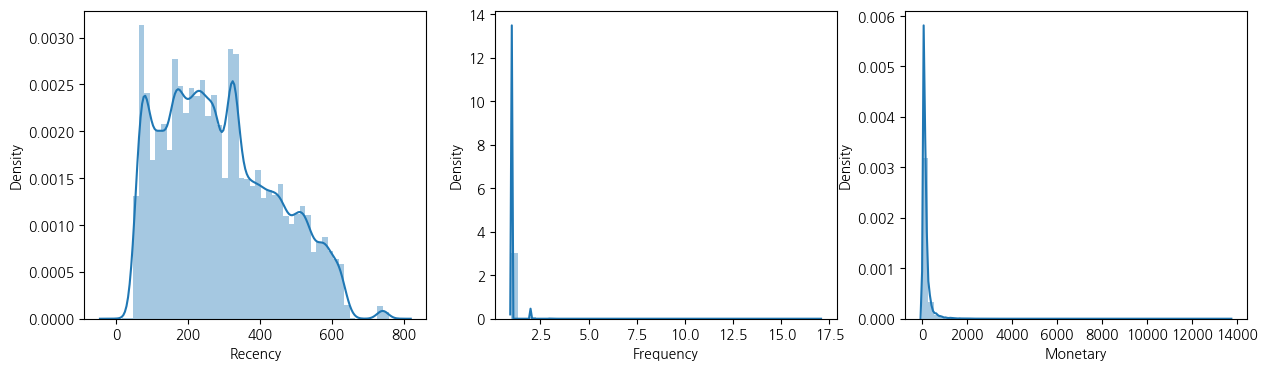

In [28]:
# 특히 F, M의 경우 치우침이 심함
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumGothic')
%matplotlib inline
fig, axes = plt.subplots(1, 3, figsize=(15,4))

axes = axes.flatten()

for col, ax in zip(['Recency', 'Frequency', 'Monetary'], axes):
    sns.distplot(result_df[col], ax = ax) 
plt.show()

### 2-2) F 퍼널 차트

In [75]:
from plotly import graph_objects as go

order_1 = len(result_df[result_df['Frequency'] == 1])
order_2 = len(result_df[result_df['Frequency'] == 2])
order_3 = len(result_df[result_df['Frequency'] >= 3])

fig = go.Figure(go.Funnel(
    y =["1회 구매", "2회 구매", "3회 이상 구매"],
    x = [order_1,order_2,order_3],
    textinfo = "value",))

fig.update_layout(
    title=dict(
        # <br> 태크와 <sup>태그 사용해서 서브 타이틀을 작성할 수 있음
        text='구매횟수별 소비자수',
        font=dict(
            family="Arial",
            size=25,
            color="#000000")))
fig.show()

In [40]:
from plotly import graph_objects as go

order_1 = len(result_df[result_df['Frequency'] == 1])
order_2 = len(result_df[result_df['Frequency'] == 2])
order_3 = len(result_df[result_df['Frequency'] >= 3])

fig = go.Figure(go.Funnel(
    y =["1회 구매", "2회 구매", "3회 이상 구매"],
    x = [order_1,order_2,order_3],
    textinfo = "value",
    opacity = 0.65, marker = {"color": ["silver", "gold", "red", 'red'],
                              
    }
    ))
fig.update_layout(
    title=dict(
        # <br> 태크와 <sup>태그 사용해서 서브 타이틀을 작성할 수 있음
        text='구매횟수별 소비자수',
        font=dict(
            family="Arial",
            size=25,
            color="#000000")))
fig.show()

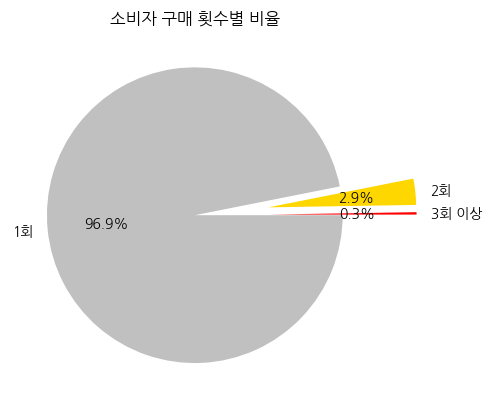

In [42]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
%matplotlib inline
ratio = [order_1,order_2,order_3]
labels = ['1회', '2회', '3회 이상']
explode = [0, 0.50, 0.50]
colors = ['silver', 'gold', 'red']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=0, counterclock=False,colors=colors,explode=explode)
plt.title('소비자 구매 횟수별 비율')
plt.show()

### 2-3) R, F, M 점수화(범위: 1~5점)
- 다만 F의 경우 거의 모든 빈도수가 1이기 때문에 F는 세 그룹으로 나눔

In [48]:
def Frequency_score(num):
    if num == 1:
        return 1
    elif num == 2:
        return 2
    else:
        return 3


result_df['R_score'] = pd.qcut(result_df['Recency'], 5, labels = [5, 4, 3, 2, 1]).astype(str)

result_df['F_score'] = result_df['Frequency'].apply(Frequency_score).astype(str)

result_df['M_score'] = pd.qcut(result_df['Monetary'], 5, labels = [1, 2, 3, 4, 5]).astype(str)
result_df

C:\Users\User\AppData\Local\Temp\ipykernel_9272\672111417.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Temp\ipykernel_9272\672111417.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Temp\ipykernel_9272\672111417.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,customer_unique_id,Recency,Frequency,Monetary,R_score,F_score,M_score
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90,4,1,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19,4,1,1
2,0000f46a3911fa3c0805444483337064,586,1,86.22,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,337,1,196.89,2,1,4
...,...,...,...,...,...,...,...
96090,fffcf5a5ff07b0908bd4e2dbc735a684,496,1,2067.42,1,1,5
96091,fffea47cd6d3cc0a88bd621562a9d061,311,1,84.58,3,1,2
96092,ffff371b4d645b6ecea244b27531430a,618,1,112.46,1,1,3
96093,ffff5962728ec6157033ef9805bacc48,169,1,133.69,4,1,4


In [80]:
R = pd.qcut(result_df['Recency'].values, 5)
R.describe()

,counts,freqs
categories,,
"(0.999, 143.0]",19324,0.201093
"(143.0, 228.0]",19299,0.200833
"(228.0, 318.0]",19043,0.198168
"(318.0, 434.0]",19300,0.200843
"(434.0, 773.0]",19129,0.199063


In [82]:
M = pd.qcut(result_df['Monetary'].values, 5)
M.describe()

,counts,freqs
categories,,
"(-0.001, 55.37]",19221,0.200021
"(55.37, 87.56]",19219,0.200000
"(87.56, 133.21]",19222,0.200031
"(133.21, 209.604]",19214,0.199948
"(209.604, 13664.08]",19219,0.200000


In [49]:
# F를 제외하고 거의 균등하게 라벨링 수행 확인

print(
        result_df['R_score'].value_counts(normalize=True)\
                           .sort_index(), '\n\n',
        result_df['F_score'].value_counts(normalize=True)\
                           .sort_index(),'\n\n',
        result_df['M_score'].value_counts(normalize=True)\
                           .sort_index()
       )

1    0.199063
2    0.200843
3    0.198168
4    0.200833
5    0.201093
Name: R_score, dtype: float64 

 1    0.968812
2    0.028565
3    0.002622
Name: F_score, dtype: float64 

 1    0.200021
2    0.200000
3    0.200031
4    0.199948
5    0.200000
Name: M_score, dtype: float64


In [94]:
result_df['R_score'].value_counts()

5    19324
2    19300
4    19299
1    19129
3    19043
Name: R_score, dtype: int64

In [95]:
result_df['F_score'].value_counts()

1    93098
2     2745
3      252
Name: F_score, dtype: int64

In [96]:
result_df['M_score'].value_counts()

3    19222
1    19221
2    19219
5    19219
4    19214
Name: M_score, dtype: int64

----
## Part 3 고객별 RFM점수에 따른 고객 등급화

### 3-1) 고객 클러스터링

In [50]:
# 필요한 라이브러리 로드

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D

In [51]:
# 학습과 예측을 위한 데이터는 아니기에 0~1사이를 반환하는 MinMax스케일링을 수행

mms = MinMaxScaler()

rfm_data_cluster = result_df[['Recency', 'Frequency', 'Monetary']]

rfm_data_scaled = mms.fit_transform(rfm_data_cluster)
rfm_data_scaled = pd.DataFrame(rfm_data_scaled, columns=['Recency', 'Frequency', 'Monetary'])    
rfm_data_scaled.head()

,Recency,Frequency,Monetary
0,0.207254,0.0,0.010385
1,0.211140,0.0,0.001990
2,0.757772,0.0,0.006310
3,0.477979,0.0,0.003192
4,0.435233,0.0,0.014409


c:\Users\User\miniconda3\envs\ds_Study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\User\miniconda3\envs\ds_Study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\User\miniconda3\envs\ds_Study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\User\miniconda3\envs\ds_Study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\User\miniconda3\envs\ds_Study\lib\site-packages\skl

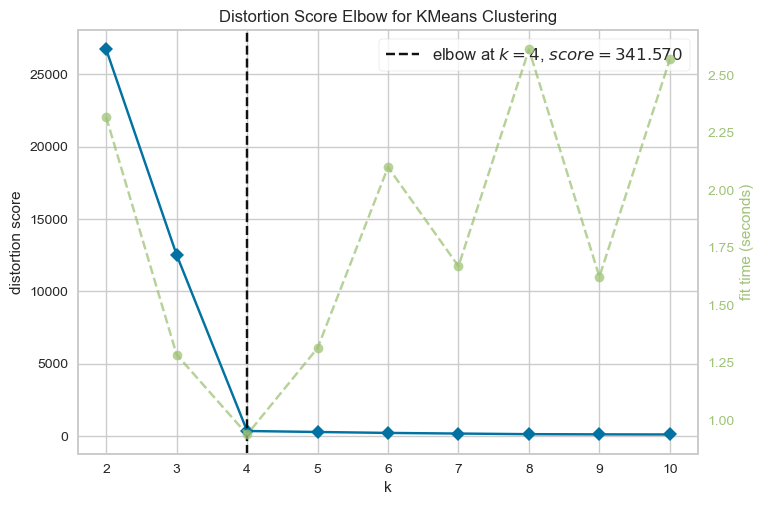

In [56]:
# 최적의 K를 탐색합니다.
# KElbowVisualizer 알고리즘을 통해 확인 가능, 4집단이 적합

km = KMeans()
elbow = KElbowVisualizer(estimator = km, k = 10)
elbow.fit(rfm_data_scaled)
elbow.show()

plt.show()

In [57]:
# 아래와 같이 총 4개의 클러스터를 할당합니다.

km = KMeans(n_clusters = 4, random_state = 42)
clusters = km.fit_predict(rfm_data_scaled)

rfm_data_scaled['cluster'] = clusters
rfm_data_scaled

c:\Users\User\miniconda3\envs\ds_Study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Recency,Frequency,Monetary,cluster
0,0.207254,0.0,0.010385,2
1,0.211140,0.0,0.001990,2
2,0.757772,0.0,0.006310,3
3,0.477979,0.0,0.003192,0
4,0.435233,0.0,0.014409,0
...,...,...,...,...
96090,0.641192,0.0,0.151303,3
96091,0.401554,0.0,0.006190,0
96092,0.799223,0.0,0.008230,3
96093,0.217617,0.0,0.009784,2


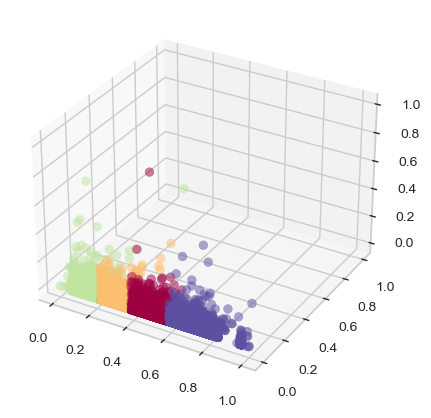

In [58]:
# 3차원 시각화로 클러스터링 상태 확인

x = rfm_data_scaled['Recency']
y = rfm_data_scaled['Frequency']
z = rfm_data_scaled['Monetary']

fig = plt.figure(figsize=(8, 5))
ax = plt.subplot(111, projection = '3d')
ax.scatter(x, y, z, s = 40, c = rfm_data_scaled['cluster'], marker = 'o', alpha = 0.5, cmap = 'Spectral')
plt.show()

In [59]:
result_df['cluster'] = rfm_data_scaled['cluster']
result_df['cluster'].value_counts().sort_index()

C:\Users\User\AppData\Local\Temp\ipykernel_9272\3779584844.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0    25368
1    27769
2    25939
3    17019
Name: cluster, dtype: int64

### 3-2) R, F, M 에 대한 가중치 계산 
- 각 클러스터의 통계량(평균, 표준편차)을 이용하여 아래와 같이 각 그룹에 대한 변동계수를 구한 뒤, R, F, M의 가중치를 계산

In [60]:
tmp = result_df.pivot_table(index = 'cluster', values=['Recency', 'Frequency', 'Monetary'], aggfunc=['mean', 'std'])
tmp

mean                               std                       
        Frequency    Monetary     Recency Frequency    Monetary    Recency
cluster                                                                   
0        1.032876  166.749379  364.730605  0.192149  230.850910  44.006278
1        1.036408  162.381013  233.372754  0.219034  202.527428  35.122056
2        1.040942  171.103561  111.566406  0.251031  247.980679  36.071041
3        1.025736  166.364667  535.792173  0.173237  249.554245  59.249587

In [61]:
# Recency = w1
import numpy as np

cv_r_0 = tmp[('std', 'Recency')][0] / tmp[('mean', 'Recency')][0]
cv_r_1 = tmp[('std', 'Recency')][1] / tmp[('mean', 'Recency')][1]
cv_r_2 = tmp[('std', 'Recency')][2] / tmp[('mean', 'Recency')][2]
cv_r_3 = tmp[('std', 'Recency')][3] / tmp[('mean', 'Recency')][3]

w_r = np.min([cv_r_0, cv_r_1, cv_r_2, cv_r_3]) / np.sum([cv_r_0, cv_r_1, cv_r_2, cv_r_3])
w_r

0.1568445093442247

In [62]:
# Frequency = w2

cv_f_0 = tmp[('std', 'Frequency')][0] / tmp[('mean', 'Frequency')][0]
cv_f_1 = tmp[('std', 'Frequency')][1] / tmp[('mean', 'Frequency')][1]
cv_f_2 = tmp[('std', 'Frequency')][2] / tmp[('mean', 'Frequency')][2]
cv_f_3 = tmp[('std', 'Frequency')][3] / tmp[('mean', 'Frequency')][3]

w_f = np.min([cv_f_0, cv_f_1, cv_f_2, cv_f_3]) / np.sum([cv_f_0, cv_f_1, cv_f_2, cv_f_3])
w_f

0.209172876544108

In [63]:
# Monetary = w3

cv_m_0 = tmp[('std', 'Monetary')][0] / tmp[('mean', 'Monetary')][0]
cv_m_1 = tmp[('std', 'Monetary')][1] / tmp[('mean', 'Monetary')][1]
cv_m_2 = tmp[('std', 'Monetary')][2] / tmp[('mean', 'Monetary')][2]
cv_m_3 = tmp[('std', 'Monetary')][3] / tmp[('mean', 'Monetary')][3]

w_m = np.min([cv_m_0, cv_m_1, cv_m_2, cv_m_3]) / np.sum([cv_m_0, cv_m_1, cv_m_2, cv_m_3])
w_m

0.2234789462524663

In [64]:
# 모든 가중치의 합을 1로 만들도록 변환하여 최종적으로 각 R, F, M에 대한 가중치를 계산
W_R = w_r / (w_r + w_f + w_m)
W_F = w_f / (w_r + w_f + w_m)
W_M = w_m / (w_r + w_f + w_m)

print(f'Weight of Recency  : {W_R}')
print(f'Weight of Frequency: {W_F}')
print(f'Weight of Monetary : {W_M}')
print(f'Total sum of weight: {np.sum([W_R, W_F, W_M])}')

Weight of Recency  : 0.26606528453643197
Weight of Frequency: 0.35483321123387046
Weight of Monetary : 0.3791015042296976
Total sum of weight: 1.0


### 3-3) 고객별 RFM 점수 산정 
- 위에서 산출한 가중치를 이용하여, 아래와 같이 100점 만점 기준의 고객별 RFM점수 계산

In [65]:
result_df['RFM_score'] = (result_df['R_score'].astype('int64') * W_R / 5 * 100 \
                        + result_df['F_score'].astype('int64') * W_F / 3 * 100 \
                        + result_df['M_score'].astype('int64') * W_M / 5 * 100)

result_df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_9272\1609873956.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,customer_unique_id,Recency,Frequency,Monetary,R_score,F_score,M_score,cluster,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90,4,1,4,2,63.441117
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19,4,1,1,2,40.695027
2,0000f46a3911fa3c0805444483337064,586,1,86.22,1,1,2,3,32.313140
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62,2,1,1,0,30.052415
4,0004aac84e0df4da2b147fca70cf8255,337,1,196.89,2,1,4,0,52.798505


### 3-4) 고객별 RFM점수에 따른 고객 등급화

In [66]:
result_df.RFM_score.describe()

count    96095.000000
mean        50.958512
std         13.733966
min         24.731109
25%         40.695027
50%         50.537781
75%         61.180392
max        100.000000
Name: RFM_score, dtype: float64

In [72]:
# RFM 점수는 아래와 같이 최저 24점부터 최대 100점까지 분포하고 있음을 알 수 있습니다.
result_df.pivot_table(index = 'RFM_score', values=['Recency', 'Frequency', 'Monetary'], aggfunc=['mean', 'count'])

mean                             count                 
           Frequency    Monetary     Recency Frequency Monetary Recency
RFM_score                                                              
24.731109   1.000000   39.724035  527.335597      3975     3975    3975
30.052415   1.000000   40.013321  366.508667      3692     3692    3692
32.313140   1.000000   71.148321  523.071197      4003     4003    4003
35.373721   1.000000   39.540534  269.627501      3949     3949    3949
36.558883   2.000000   40.972857  579.000000         7        7       7
...              ...         ...         ...       ...      ...     ...
88.172226   2.000000  421.240959   94.456395       344      344     344
89.357389   3.642857  612.381429  272.714286        28       28      28
92.417970   3.000000  171.633333   85.833333         6        6       6
94.678694   3.370370  538.825741  188.944444        54       54      54
100.000000  3.723077  794.085385   91.923077        65       65      65

[67 rows x 6 columns]

In [68]:
# 'Bronze', 'Silver', 'Gold', 'Vip' 4그룹으로 등급화
result_df['class'] = pd.qcut(result_df.RFM_score, 4, labels = ['Bronze', 'Silver', 'Gold', 'Vip'])
result_df.head(10)

C:\Users\User\AppData\Local\Temp\ipykernel_9272\779518894.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,customer_unique_id,Recency,Frequency,Monetary,R_score,F_score,M_score,cluster,RFM_score,class
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90,4,1,4,2,63.441117,Vip
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19,4,1,1,2,40.695027,Bronze
2,0000f46a3911fa3c0805444483337064,586,1,86.22,1,1,2,3,32.313140,Bronze
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62,2,1,1,0,30.052415,Bronze
4,0004aac84e0df4da2b147fca70cf8255,337,1,196.89,2,1,4,0,52.798505,Gold
5,0004bd2a26a76fe21f786e4fbd80607f,195,1,166.98,4,1,4,1,63.441117,Vip
6,00050ab1314c0e55a6ca13cf7181fecf,181,1,35.38,4,1,1,1,40.695027,Bronze
7,00053a61a98854899e70ed204dd4bafe,232,1,419.18,3,1,5,1,65.701841,Vip
8,0005e1862207bf6ccc02e4228effd9a0,592,1,150.12,1,1,4,3,47.477200,Silver
9,0005ef4cd20d2893f0d9fbd94d3c0d97,220,1,129.76,4,1,3,1,55.859087,Gold


In [69]:
result_df['class'].value_counts()

Bronze    27203
Gold      26191
Silver    22024
Vip       20677
Name: class, dtype: int64

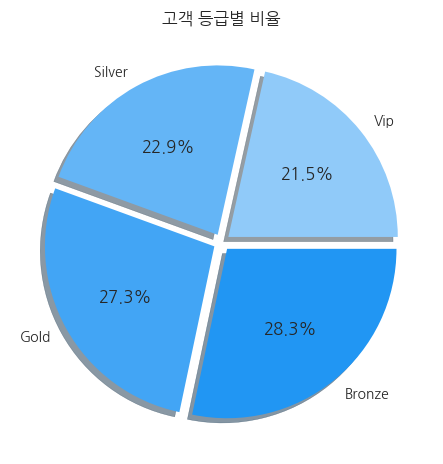

In [102]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
%matplotlib inline
ratio = result_df['class'].value_counts().tolist()
labels = ['Bronze', 'Gold', 'Silver', 'Vip']
explode = [0.05, 0.05, 0.05,0.05]
colors = ['#2196F3','#42A5F5', '#64B5F6', '#90CAF9']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=0, counterclock=False,colors=colors,explode=explode, shadow=True)
plt.title('고객 등급별 비율')
plt.show()

In [71]:
result_df.to_csv('./rfm_data.csv')

------------
### 번외) 고객별 구매횟수에 따른 리뷰 점수

In [ ]:
reviews_df = pd.read_csv('./data/olist_order_reviews_dataset.csv')

In [45]:
target = result_df[result_df['Frequency'] == 1].index
target = customers_df[customers_df['customer_unique_id'].isin(target)].drop_duplicates('customer_unique_id')['customer_id'].values
target = orders_df[orders_df['customer_id'].isin(target)]['order_id'].values
tmp = reviews_df[reviews_df['order_id'].isin(target)]
tmp

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [43]:
tmp['review_score'].value_counts()

5    53259
4    17982
1    10662
3     7626
2     2947
Name: review_score, dtype: int64

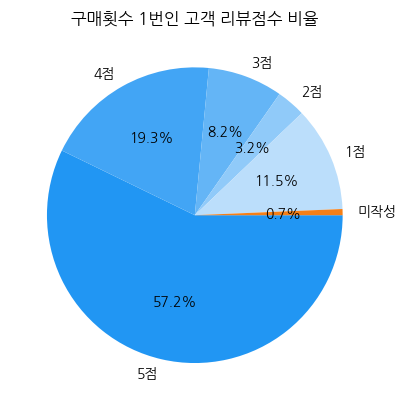

In [56]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
%matplotlib inline
ratio = [53259,17982,7626,2947,10662, 623]
labels = ['5점','4점','3점','2점','1점','미작성']
explode = [0, 0.50, 0.50]
colors = ['#2196F3','#42A5F5', '#64B5F6', '#90CAF9', '#BBDEFB', '#F57F17']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=0, counterclock=False,colors=colors,)#explode=explode)
plt.title('구매횟수 1번인 고객 리뷰점수 비율')
plt.show()

In [59]:
target = result_df[result_df['Frequency'] >= 3].index
target = customers_df[customers_df['customer_unique_id'].isin(target)].drop_duplicates('customer_unique_id')['customer_id'].values
target = orders_df[orders_df['customer_id'].isin(target)]['order_id'].values
tmp = reviews_df[reviews_df['order_id'].isin(target)]
tmp

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
343,9325f9b2fdf236da5f64533a9aa1934f,6c21f6a1d56c99f439fe378d0ac026f2,5,NaN,NaN,2018-04-11 00:00:00,2018-04-13 22:54:36
433,957011305e7a4b6c8a266eeeb8e0316d,54b4da510fed5dc3cf3e7a8e50a5f224,4,NaN,NaN,2018-03-10 00:00:00,2018-03-10 23:35:51
1163,771654d19b26b9108952856b225ad105,4703440eb9289d3769819920e98ec061,5,NaN,NaN,2018-02-15 00:00:00,2018-02-16 01:50:41
1957,ce6724cc84c674a4a4e183e6452cf94d,fd2a39a376a840fa97ed572777c2b0e3,5,NaN,excelente,2017-07-11 00:00:00,2017-07-13 15:11:07
1985,ffb8cff872a625632ac983eb1f88843c,c88b1d1b157a9999ce368f218a407141,3,NaN,NaN,2017-07-22 00:00:00,2017-07-26 13:41:07
...,...,...,...,...,...,...,...
95790,2f548642948625cb3679500f24d97fb5,30d26db01f4ba88841bfbdbf5aaa8711,4,bom,"só pra receber demorou um pouco, do resto nada...",2018-06-04 00:00:00,2018-06-08 03:10:42
95890,eeb67e77273a728a81223b9b9a4242aa,3db932725b90f4f388d2e361b0f1247e,5,NaN,otima,2017-08-15 00:00:00,2017-08-18 08:20:16
96171,18a8ccfcc9ade81c05d45325cfa9aec4,67d3db1e6d9adab9c49e67e8a2e65b8f,5,NaN,NaN,2018-08-05 00:00:00,2018-08-07 16:48:17
96285,992831202d20a113e87997bcc71b3b9d,8dd1e8dc5df5298f67ade481b8b652c8,5,NaN,NaN,2018-02-15 00:00:00,2018-02-16 12:09:36


In [ ]:
tmp['review_score'].value_counts()

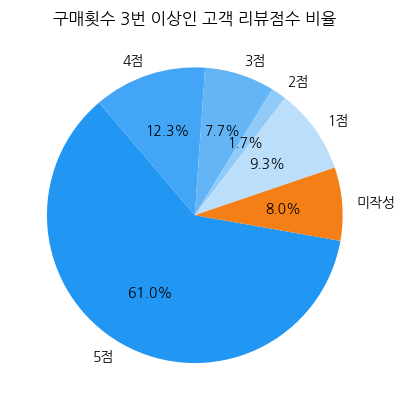

In [63]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
%matplotlib inline
ratio = [183,37,23,5,28, 24]
labels = ['5점','4점','3점','2점','1점','미작성']
explode = [0, 0.50, 0.50]
colors = ['#2196F3','#42A5F5', '#64B5F6', '#90CAF9', '#BBDEFB', '#F57F17']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=-10, counterclock=False,colors=colors,)#explode=explode)
plt.title('구매횟수 3번 이상인 고객 리뷰점수 비율')
plt.show()